In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X = pd.read_csv("yelp_feature.csv")
X = pd.DataFrame(X)
#X = X[0:20000]
y=X['stars']
X.shape

(1048575, 6)

In [3]:
X.head()

,average_stars,elite_count,fans,friends_count,business_average_stars,stars
0,4.03,3,5,99,3.857143,4.000000
1,3.63,0,4,1152,3.976190,3.666667
2,3.71,0,0,15,3.794118,3.705882
3,4.85,0,5,525,4.000000,5.000000
4,4.08,4,39,231,4.076923,4.692308


In [4]:
X = X.drop(['stars'], axis=1)

scaler=StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)


In [14]:
# Use Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ranmodel = RandomForestClassifier(n_estimators=100）
ranmodel = ranmodel.fit(X_train, y_train)

In [15]:
# use model to predict
resultpro=ranmodel.predict_proba(X_test)
result=ranmodel.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

print(accuracy_score(y_test, result))
# print(y_test)
# print(clf_y_predict)


# #logloss
# one_hot = OneHotEncoder(n_values=6, sparse=False)
# y_true = one_hot.fit_transform(y_test)
# y_pred = one_hot.fit_transform(clf_y_predict)
# log_loss(y_true, y_pred)

# print(X_test[0])

0.6910896301269531


In [39]:
print(resultpro[0])
print(result[0])
print(y_test[0])

[0.    0.    0.643 0.357 0.   ]
3
4


In [46]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
 
# 设置种类
print(result)
n_classes = 4


[3 3 5 ... 5 3 4]


In [47]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,result))  
print(classification_report(y_test, result))

[[24807  3045  3881   914  1470]
 [ 3310 12362  6493  1417  1190]
 [ 2214  4279 40963 10067  3941]
 [  774  1192 11927 39713  8711]
 [ 1227   856  5660 10530 61201]]
              precision    recall  f1-score   support

           1       0.77      0.73      0.75     34117
           2       0.57      0.50      0.53     24772
           3       0.59      0.67      0.63     61464
           4       0.63      0.64      0.64     62317
           5       0.80      0.77      0.78     79474

   micro avg       0.68      0.68      0.68    262144
   macro avg       0.67      0.66      0.67    262144
weighted avg       0.69      0.68      0.68    262144



In [48]:
result

array([3, 3, 5, ..., 5, 3, 4])

Text(0, 0.5, 'Mean Error')

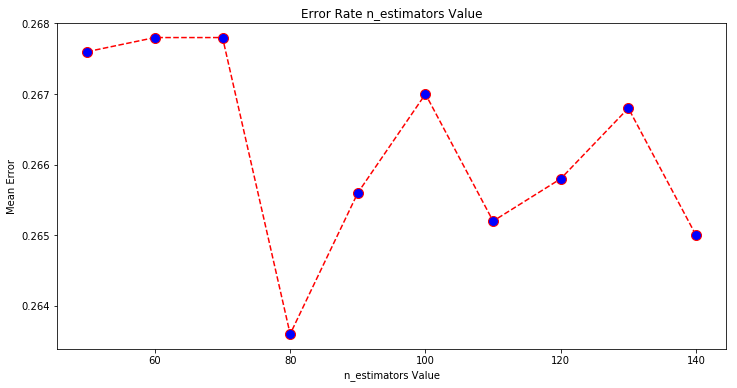

In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(50,150,10):  
    RD = RandomForestClassifier(n_estimators=i)
    RD.fit(X_train, y_train)
    pred_i = RD.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(50,150,10), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate n_estimators Value')  
plt.xlabel('n_estimators Value')  
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

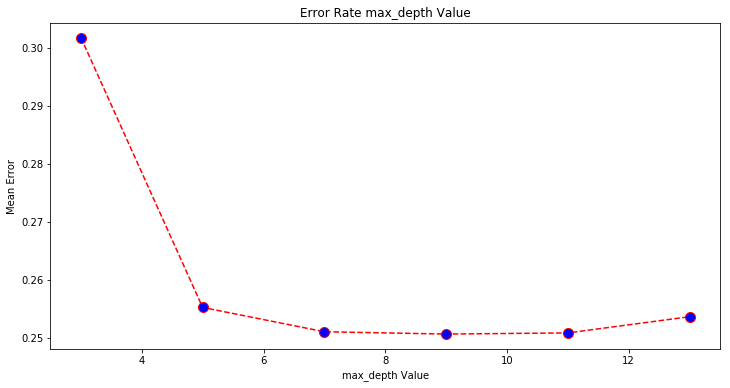

In [29]:
error1 = []

# Calculating error for K values between 1 and 40
for i in range(3,14,2):  
    RD = RandomForestClassifier(n_estimators=80,max_depth=i)
    RD.fit(X_train, y_train)
    pred_i = RD.predict(X_test)
    error1.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(3,14,2), error1, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate max_depth Value')  
plt.xlabel('max_depth Value')  
plt.ylabel('Mean Error')

In [5]:
# Use Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ranmodel = RandomForestClassifier(n_estimators=100,max_depth=7)
ranmodel = ranmodel.fit(X_train, y_train)

/Users/yuningsong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
resultpro=ranmodel.predict_proba(X_test)
result=ranmodel.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

print(accuracy_score(y_test, result))

0.6742057800292969


In [8]:
print(resultpro[0])
print(result[0])
print(y_test[0])

[0.04411099 0.10211423 0.56694687 0.22413887 0.06268904]
3
4


In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,result))  
print(classification_report(y_test, result))

[[23412  3042  5683  1374   606]
 [ 2983  8986 10873  1339   591]
 [ 1146  2467 45295 10985  1571]
 [  455   363 13969 43597  3933]
 [  546   377  7645 15457 55449]]
             precision    recall  f1-score   support

          1       0.82      0.69      0.75     34117
          2       0.59      0.36      0.45     24772
          3       0.54      0.74      0.63     61464
          4       0.60      0.70      0.65     62317
          5       0.89      0.70      0.78     79474

avg / total       0.70      0.67      0.68    262144



In [10]:
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_test, y_pred): 
 

    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(y_test, result)

18.391984303792317

In [13]:
from sklearn.externals import joblib

# 保存模型到 model.joblib 文件
joblib.dump(ranmodel, "RD_model.joblib" ,compress=1)

['RD_model.joblib']